##IMPORTING REQUIRED LIBRARIES


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [9]:

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score

In [3]:
%cd "drive/MyDrive/spacesense"

/content/drive/MyDrive/spacesense


##LOADING THE SAVED MODEL

In [7]:
model1=tf.keras.models.load_model("models/vgg1.h5")


##FUNCTION FOR DISPLAYING PREDICTIONS 

In [48]:
def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T
    results.rename(columns={0: 'Precision',
                           1: 'Recall',
                           2: 'F-Score',
                           3: 'Support'}, inplace=True)
    
    conf_mat = pd.DataFrame(confusion_matrix(y_true, y_preds), 
                            columns=class_labels,
                            index=class_labels)    
    f2 = fbeta_score(y_true, y_preds, beta=2, average='micro')
    print(f"Global F2 Score: {f2}")    
    return results, conf_mat

def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = np.argmax(y_preds[idx])
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))    
        plt.savefig('results.png')

In [11]:
TEST_DIR="testing/"

In [13]:
from keras.preprocessing.image import ImageDataGenerator


In [14]:
test_gen = ImageDataGenerator(
    rescale=1./255)

In [15]:
test_generator_new = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,
    color_mode='rgb',
    shuffle=False,
    seed=69)


Found 5422 images belonging to 10 classes.


In [19]:
class_indices=np.load("indexed_classes.npy", allow_pickle=True)

In [22]:
class_indices=class_indices.tolist()

In [38]:
class_indices = test_generator_new.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())


##CLASSICATION REPORT

In [39]:
predictions = model1.predict_generator(test_generator_new, steps=len(test_generator_new.filenames))
predicted_classes = np.argmax(np.rint(predictions), axis=1)
true_classes = test_generator_new.classes

prf, conf_mat = display_results(true_classes, predicted_classes, class_indices.values())
prf

<ipython-input-39-b06688bce732>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model1.predict_generator(test_generator_new, steps=len(test_generator_new.filenames))


Global F2 Score: 0.9690151235706381


,Precision,Recall,F-Score,Support
AnnualCrop,0.958194,0.955000,0.956594,600.0
Forest,0.986644,0.985000,0.985822,600.0
HerbaceousVegetation,0.957265,0.930233,0.943555,602.0
Highway,0.979839,0.972000,0.975904,500.0
Industrial,0.984615,0.988417,0.986513,518.0
Pasture,0.920000,0.977500,0.947879,400.0
PermanentCrop,0.936605,0.916000,0.926188,500.0
Residential,0.993344,0.995000,0.994172,600.0
River,0.977823,0.970000,0.973896,500.0
SeaLake,0.980424,0.998339,0.989300,602.0


##CONFUSION MATRIX

In [41]:
conf_mat

,AnnualCrop,Forest,HerbaceousVegetation,Highway,Industrial,Pasture,PermanentCrop,Residential,River,SeaLake
AnnualCrop,573,0,1,0,0,12,7,0,2,5
Forest,0,591,2,0,0,4,0,0,2,1
HerbaceousVegetation,2,4,560,0,0,13,19,0,0,4
Highway,3,0,1,486,2,1,3,0,3,1
Industrial,2,0,0,1,512,0,0,3,0,0
Pasture,3,3,1,0,0,391,2,0,0,0
PermanentCrop,10,0,20,1,3,4,458,1,3,0
Residential,0,0,0,0,3,0,0,597,0,0
River,5,1,0,8,0,0,0,0,485,1
SeaLake,0,0,0,0,0,0,0,0,1,601


## Prediction using 20 sample images from the dataset.

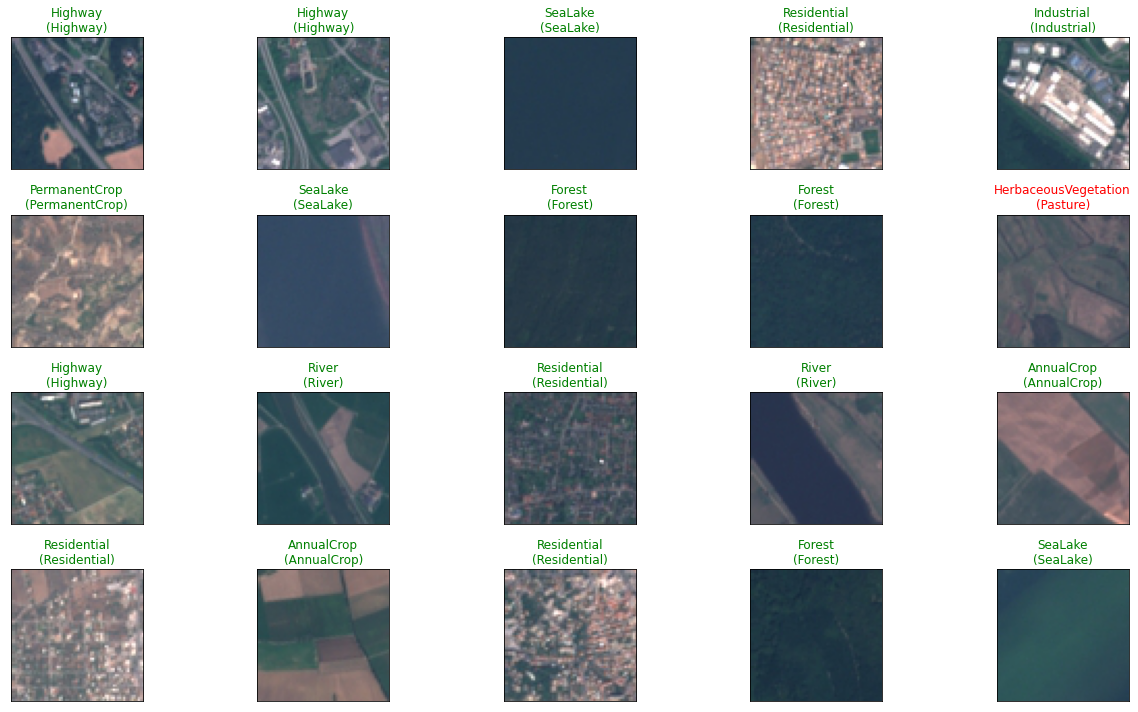

In [49]:
plot_predictions(true_classes, predictions, test_generator_new, class_indices)